In [1]:
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
pip install praw

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import praw

In [4]:
reddit = praw.Reddit(
    client_id= 'Sf695hto-aPmp_vJvG5VRA',
    client_secret='l7FWeWpdjkhUu9UMNI2BvnUeDXai0w',
    user_agent='MyStockBot/1.0 by Salt-Interest6663'
)

In [5]:
subreddit = reddit.subreddit('stocks')  # Change to 'investing' or other relevant subreddits
posts = []
for submission in subreddit.new(limit=500):  # Fetch 500 latest posts
    posts.append({
        'title': submission.title,
        'selftext': submission.selftext,
        'score': submission.score,
        'comments': submission.num_comments,
        'created_utc': submission.created_utc
    })

In [6]:
df = pd.DataFrame(posts)
df.to_csv('reddit_stocks.csv', index=False)

In [7]:
import re

# Load the dataset
df = pd.read_csv('reddit_stocks.csv')

# Combine title and selftext
df['text'] = df['title'].fillna('') + ' ' + df['selftext'].fillna('')

# Remove noise (URLs, special characters, etc.)
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = text.lower()  # Lowercase
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [8]:
df.head()

,title,selftext,score,comments,created_utc,text,clean_text
0,Ocean Exploration Stocks! The next big sector!,"In my opinion, ocean exploration stocks are he...",0,29,1.732989e+09,Ocean Exploration Stocks! The next big sector!...,ocean exploration stocks the next big sector ...
1,r/Stocks Weekly Thread on Meme Stocks Saturday...,The meme stock scheduled posts will now run we...,2,1,1.732986e+09,r/Stocks Weekly Thread on Meme Stocks Saturday...,rstocks weekly thread on meme stocks saturday ...
2,/r/Stocks Weekend Discussion Saturday - Nov 30...,This is the weekend edition of our stickied di...,5,50,1.732963e+09,/r/Stocks Weekend Discussion Saturday - Nov 30...,rstocks weekend discussion saturday nov 30 20...
3,The evolution of an investor - Which level are...,I believe there’s a common journey (or evaluat...,0,17,1.732957e+09,The evolution of an investor - Which level are...,the evolution of an investor which level are ...
4,Do you think Rivian would make it to $100 a sh...,"With talks of Rivian saving VW, California kee...",182,431,1.732940e+09,Do you think Rivian would make it to $100 a sh...,do you think rivian would make it to 100 a sha...


## Data Analysis

In [9]:
pip install Textblob


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
from textblob import TextBlob

def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    return sentiment

df['sentiment'] = df['clean_text'].apply(get_sentiment)

In [11]:
#Feature Extraction


#Sentiment polarity (df['sentiment'])
#Frequency of mentions of specific stocks

In [12]:
def count_mentions(text, tickers):
    return sum(text.count(ticker) for ticker in tickers)

tickers = ['AAPL', 'TSLA', 'AMZN']  # List of stock tickers
df['mention_count'] = df['clean_text'].apply(lambda x: count_mentions(x, tickers))

In [13]:
df

,title,selftext,score,comments,created_utc,text,clean_text,sentiment,mention_count
0,Ocean Exploration Stocks! The next big sector!,"In my opinion, ocean exploration stocks are he...",0,29,1.732989e+09,Ocean Exploration Stocks! The next big sector!...,ocean exploration stocks the next big sector ...,0.172567,0
1,r/Stocks Weekly Thread on Meme Stocks Saturday...,The meme stock scheduled posts will now run we...,2,1,1.732986e+09,r/Stocks Weekly Thread on Meme Stocks Saturday...,rstocks weekly thread on meme stocks saturday ...,0.246057,0
2,/r/Stocks Weekend Discussion Saturday - Nov 30...,This is the weekend edition of our stickied di...,5,50,1.732963e+09,/r/Stocks Weekend Discussion Saturday - Nov 30...,rstocks weekend discussion saturday nov 30 20...,0.027778,0
3,The evolution of an investor - Which level are...,I believe there’s a common journey (or evaluat...,0,17,1.732957e+09,The evolution of an investor - Which level are...,the evolution of an investor which level are ...,0.181777,0
4,Do you think Rivian would make it to $100 a sh...,"With talks of Rivian saving VW, California kee...",182,431,1.732940e+09,Do you think Rivian would make it to $100 a sh...,do you think rivian would make it to 100 a sha...,0.100000,0
...,...,...,...,...,...,...,...,...,...
495,Cloudstrike (CRWD) analysis,# CRWD\n\n# Current Price: $310.20 USD\n\n# Da...,0,28,1.729529e+09,Cloudstrike (CRWD) analysis # CRWD\n\n# Curre...,cloudstrike crwd analysis crwd\n\n current p...,0.064599,0
496,10-year Treasury yield jumps as investors moni...,It would be interesting to see that 10-year Tr...,113,38,1.729528e+09,10-year Treasury yield jumps as investors moni...,10year treasury yield jumps as investors monit...,0.145092,0
497,What happens when the 10year 3month yield curv...,September 23rd was at -.89% today October 21st...,0,23,1.729527e+09,What happens when the 10year 3month yield curv...,what happens when the 10year 3month yield curv...,-0.188961,0
498,AI ETF's or VGT/QQQ?,Are there any good etfs dedicated to AI or is ...,13,20,1.729517e+09,AI ETF's or VGT/QQQ? Are there any good etfs d...,ai etfs or vgtqqq are there any good etfs dedi...,0.104938,0


## Model buliding

In [14]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
import yfinance as yf

# Fetch historical stock data
stock_data = yf.download("AAPL", start="2023-01-01", end="2023-12-31")

[*********************100%***********************]  1 of 1 completed


In [16]:
stock_data['price_change'] = stock_data['Close'].pct_change()  # Percentage change
stock_data['movement'] = stock_data['price_change'].apply(lambda x: 1 if x > 0 else 0)

In [17]:
stock_data

Price,Adj Close,Close,High,Low,Open,Volume,price_change,movement
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,,
2023-01-03,123.768448,125.070000,130.899994,124.169998,130.279999,112117500,NaN,0
2023-01-04,125.045036,126.360001,128.660004,125.080002,126.889999,89113600,0.010314,1
2023-01-05,123.718979,125.019997,127.769997,124.760002,127.129997,80962700,-0.010605,0
2023-01-06,128.271103,129.619995,130.289993,124.889999,126.010002,87754700,0.036794,1
2023-01-09,128.795593,130.149994,133.410004,129.889999,130.470001,70790800,0.004089,1
...,...,...,...,...,...,...,...,...
2023-12-22,192.656174,193.600006,195.410004,192.970001,195.179993,37122800,-0.005547,0
2023-12-26,192.108871,193.050003,193.889999,192.830002,193.610001,28919300,-0.002841,0


In [18]:
df=stock_data.copy()

In [19]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,price_change,movement
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,,
2023-01-03,123.768448,125.070000,130.899994,124.169998,130.279999,112117500,NaN,0
2023-01-04,125.045036,126.360001,128.660004,125.080002,126.889999,89113600,0.010314,1
2023-01-05,123.718979,125.019997,127.769997,124.760002,127.129997,80962700,-0.010605,0
2023-01-06,128.271103,129.619995,130.289993,124.889999,126.010002,87754700,0.036794,1
2023-01-09,128.795593,130.149994,133.410004,129.889999,130.470001,70790800,0.004089,1


In [20]:
# Calculate the mean of 'price_change' (ignoring NaN values)
mean_value = df['price_change'].mean()

# Fill NaN values with the mean
df['price_change'].fillna(mean_value, inplace=True)


C:\Users\peram\AppData\Local\Temp\ipykernel_812\1648740243.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_change'].fillna(mean_value, inplace=True)


In [21]:
df.isna().sum()

Price         Ticker
Adj Close     AAPL      0
Close         AAPL      0
High          AAPL      0
Low           AAPL      0
Open          AAPL      0
Volume        AAPL      0
price_change            1
movement                0
dtype: int64

In [22]:
df['movement'].value_counts

<bound method IndexOpsMixin.value_counts of Date
2023-01-03    0
2023-01-04    1
2023-01-05    0
2023-01-06    1
2023-01-09    1
             ..
2023-12-22    0
2023-12-26    0
2023-12-27    1
2023-12-28    1
2023-12-29    0
Name: movement, Length: 250, dtype: int64>

In [23]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,price_change,movement
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,,
2023-01-03,123.768448,125.070000,130.899994,124.169998,130.279999,112117500,NaN,0
2023-01-04,125.045036,126.360001,128.660004,125.080002,126.889999,89113600,0.010314,1
2023-01-05,123.718979,125.019997,127.769997,124.760002,127.129997,80962700,-0.010605,0
2023-01-06,128.271103,129.619995,130.289993,124.889999,126.010002,87754700,0.036794,1
2023-01-09,128.795593,130.149994,133.410004,129.889999,130.470001,70790800,0.004089,1


In [24]:
df=df[1:]

In [25]:
df.shape

(249, 8)

In [26]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


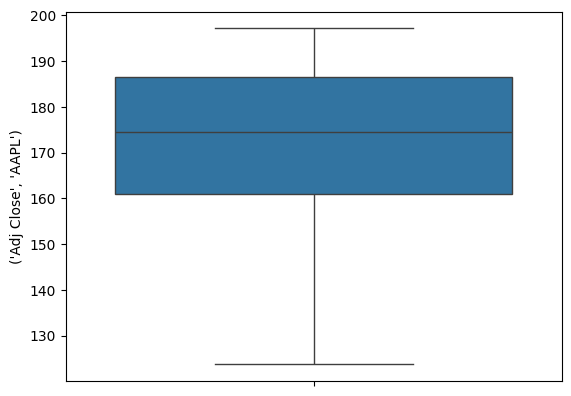

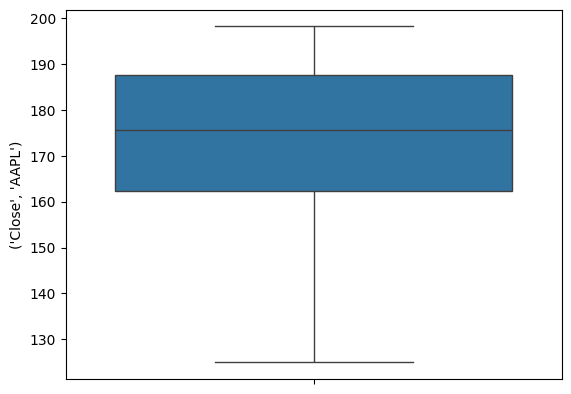

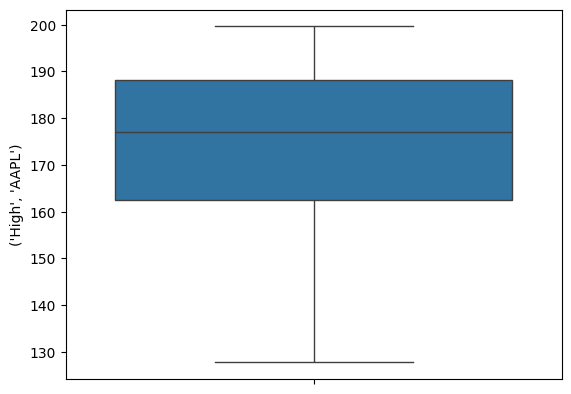

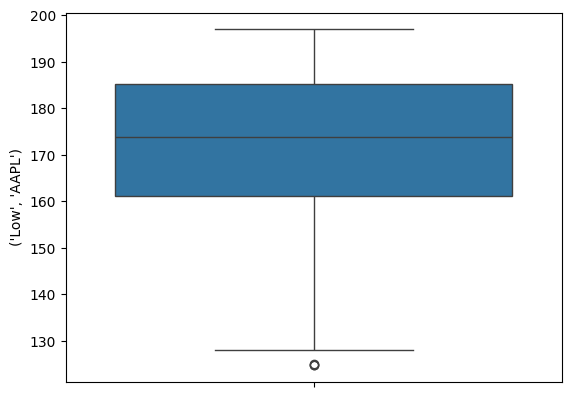

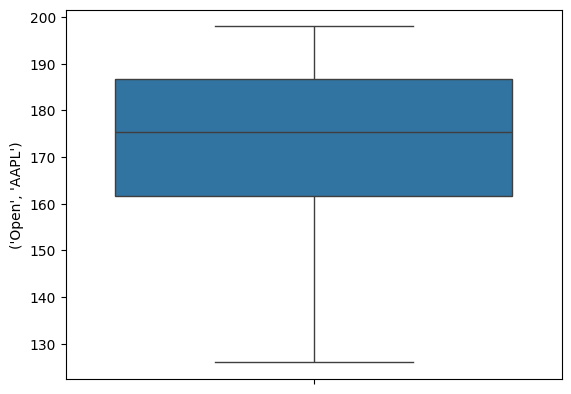

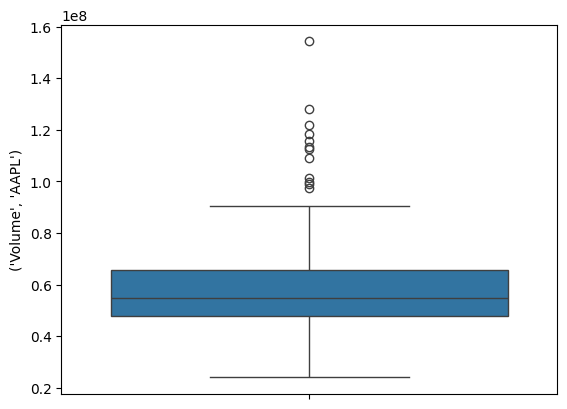

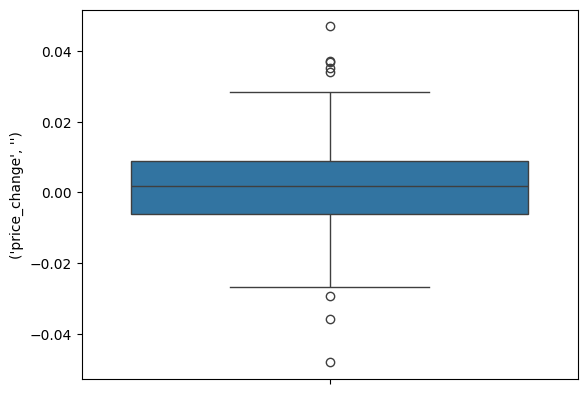

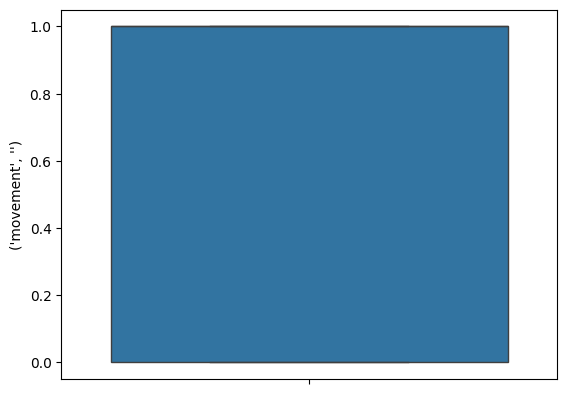

In [27]:

import seaborn as sns 
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(df[i])
  plt.show()
  

In [28]:
def out(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1 
  ll=q1-1.5*iqr 
  uw=q3+1.5*iqr 
  return ll,uw 
for i in df.select_dtypes(include='number').columns:
  ll,uw=out(df[i])
  df[i]=np.where(df[i]<ll,ll,df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])

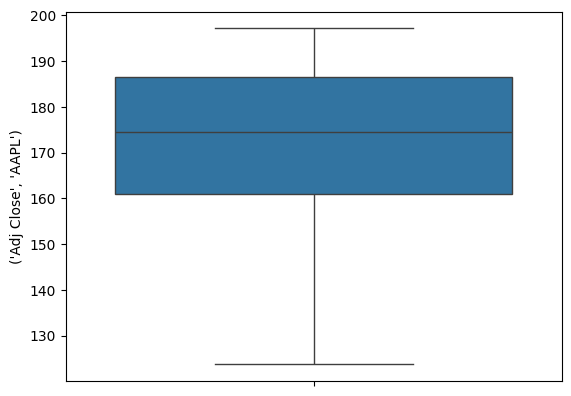

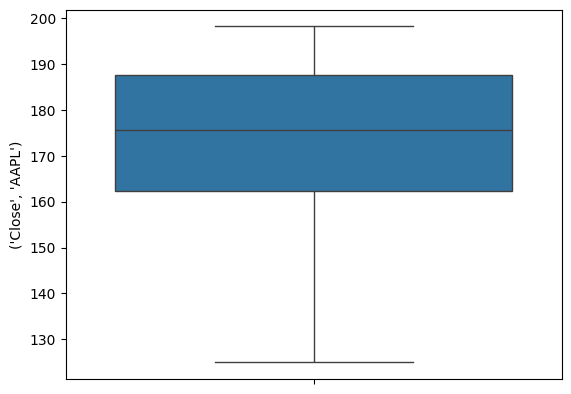

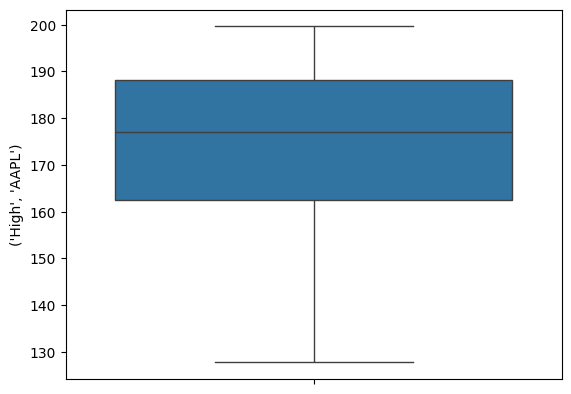

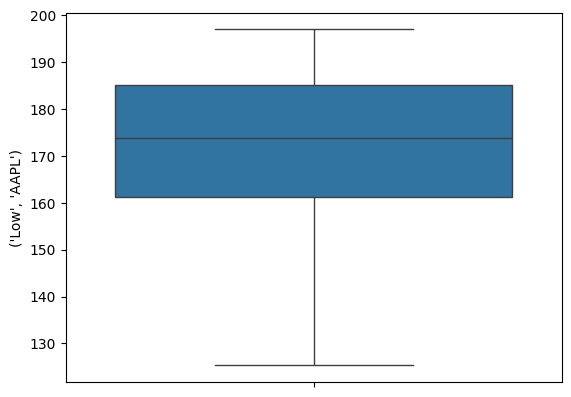

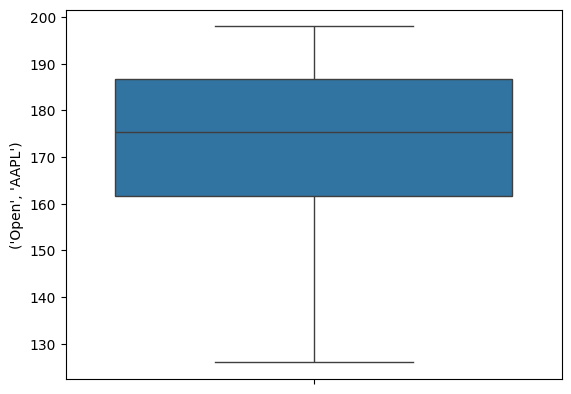

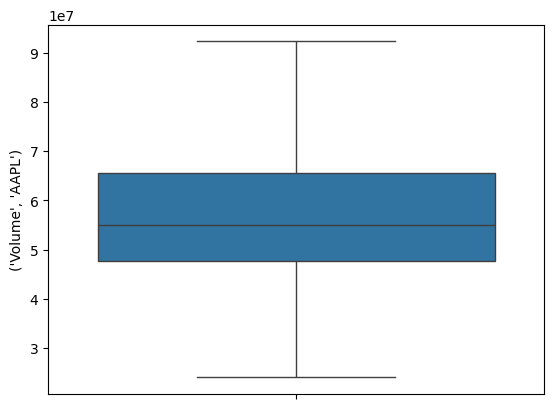

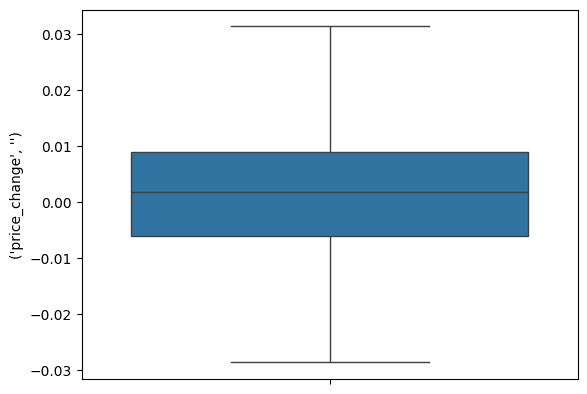

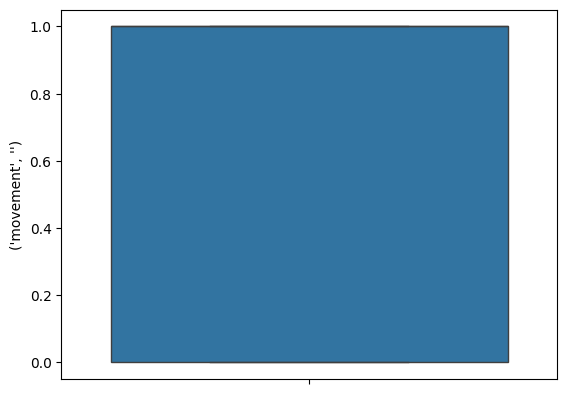

In [29]:
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(df[i])
  plt.show()
  

In [30]:
df = df.astype(int )# Converts all columns to integers

In [31]:
df['price_change'].value_counts

<bound method IndexOpsMixin.value_counts of Date
2023-01-04    0
2023-01-05    0
2023-01-06    0
2023-01-09    0
2023-01-10    0
             ..
2023-12-22    0
2023-12-26    0
2023-12-27    0
2023-12-28    0
2023-12-29    0
Name: price_change, Length: 249, dtype: int64>

In [32]:
df.head(2)

Price,Adj Close,Close,High,Low,Open,Volume,price_change,movement
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,,
2023-01-04,125,126,128,125,126,89113600,0,1
2023-01-05,123,125,127,125,127,80962700,0,0


In [33]:
df.columns = df.columns.set_levels(
    df.columns.levels[1].str.replace('AAPL', 'Twitter'), level='Ticker'
)

In [34]:
df

Price,Adj Close,Close,High,Low,Open,Volume,price_change,movement
Ticker,Twitter,Twitter,Twitter,Twitter,Twitter,Twitter,,
Date,,,,,,,,
2023-01-04,125,126,128,125,126,89113600,0,1
2023-01-05,123,125,127,125,127,80962700,0,0
2023-01-06,128,129,130,125,126,87754700,0,1
2023-01-09,128,130,133,129,130,70790800,0,1
2023-01-10,129,130,131,128,130,63896200,0,1
...,...,...,...,...,...,...,...,...
2023-12-22,192,193,195,192,195,37122800,0,0
2023-12-26,192,193,193,192,193,28919300,0,0


In [35]:
df=df.drop(columns=['price_change'])

In [36]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,movement
Ticker,Twitter,Twitter,Twitter,Twitter,Twitter,Twitter,
Date,,,,,,,
2023-01-04,125,126,128,125,126,89113600,1
2023-01-05,123,125,127,125,127,80962700,0
2023-01-06,128,129,130,125,126,87754700,1
2023-01-09,128,130,133,129,130,70790800,1
2023-01-10,129,130,131,128,130,63896200,1


In [37]:
#splitting the data 
x=df.drop(columns='movement')
y=df['movement']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [39]:
x

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,Twitter,Twitter,Twitter,Twitter,Twitter,Twitter
Date,,,,,,
2023-01-04,125,126,128,125,126,89113600
2023-01-05,123,125,127,125,127,80962700
2023-01-06,128,129,130,125,126,87754700
2023-01-09,128,130,133,129,130,70790800
2023-01-10,129,130,131,128,130,63896200
...,...,...,...,...,...,...
2023-12-22,192,193,195,192,195,37122800
2023-12-26,192,193,193,192,193,28919300


In [40]:
y

Date
2023-01-04    1
2023-01-05    0
2023-01-06    1
2023-01-09    1
2023-01-10    1
             ..
2023-12-22    0
2023-12-26    0
2023-12-27    1
2023-12-28    1
2023-12-29    0
Name: movement, Length: 249, dtype: int64

In [41]:
# from sklearn.preprocessing import StandardScaler
# sr = StandardScaler()

# # Fit the scaler on training data and transform it
# new_x_train = sr.fit_transform(x_train)

# # Use the same scaler to transform the test data
# new_x_test = sr.transform(x_test)


In [42]:
# new_x_train

In [43]:
# new_x_test

In [44]:
import numpy as np
from sklearn.linear_model import LogisticRegression
li = LogisticRegression()
li.fit(x_train, y_train)


LogisticRegression()

In [45]:
y_pred=li.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [46]:
# is is imbalanced data right i am go with Logisticregresssion

In [47]:
ac=accuracy_score(y_test,y_pred)
print(ac)
ps=precision_score(y_test,y_pred)
print(ps)
f1=f1_score(y_test,y_pred)
print(f1)
rc=recall_score(y_test,y_pred)
print(rc)


0.52
0.5416666666666666
0.6842105263157895
0.9285714285714286


In [48]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred1=knn.predict(x_test)

In [49]:
ac1=accuracy_score(y_test,y_pred1)
print(ac1)
ps1=precision_score(y_test,y_pred1)
print(ps1)
f2=f1_score(y_test,y_pred1)
print(f2)
rc1=recall_score(y_test,y_pred1)
print(rc1)

0.66
0.6410256410256411
0.746268656716418
0.8928571428571429


In [50]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier()
rd.fit(x_train,y_train)
y_pred2=rd.predict(x_test)

In [51]:
y_pred2

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0])

In [52]:
ac2=accuracy_score(y_test,y_pred2)
print(ac2)
ps2=precision_score(y_test,y_pred2)
print(ps2)
f3=f1_score(y_test,y_pred2)
print(f3)
rc2=recall_score(y_test,y_pred2)
print(rc2)

0.58
0.6666666666666666
0.5714285714285714
0.5


In [53]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [54]:
#XGBClassifier
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred3=xg.predict(x_test)

In [55]:
y_pred3

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0])

In [56]:
ac4=accuracy_score(y_test,y_pred3)
print(ac4)
ps4=precision_score(y_test,y_pred3)
print(ps4)
f11=f1_score(y_test,y_pred3)
print(f11)
rc4=recall_score(y_test,y_pred3)
print(rc4)

0.58
0.64
0.6037735849056604
0.5714285714285714


In [57]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_preda=dt.predict(x_test)

In [58]:
y_preda

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0])

In [59]:
a=accuracy_score(y_test,y_preda)
print(a)
p=precision_score(y_test,y_preda)
print(p)
f=f1_score(y_test,y_preda)
print(f)
r=recall_score(y_test,y_preda)
print(r)

0.5
0.5714285714285714
0.4897959183673469
0.42857142857142855


In [60]:
# Import the SVC model
from sklearn.svm import SVC

# Create an SVC model instance
svm_model = SVC()

# Fit the model to training data
svm_model.fit(x_train, y_train)

# Predict on test data
y_pred_4= svm_model.predict(x_test)


In [61]:
y_pred_4

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [62]:
a1=accuracy_score(y_test,y_pred_4)
print(a1)
p1=precision_score(y_test,y_pred_4)
print(p1)
f1=f1_score(y_test,y_pred_4)
print(f1)
r1=recall_score(y_test,y_pred_4)
print(r1)

0.56
0.56
0.717948717948718
1.0


In [63]:
import joblib
joblib.dump(li,"stock_logi.pkl")

['stock_logi.pkl']